In [24]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [25]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [26]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([6, 5, 4, 3, 7, 8, 1, 9, 0]), tensor([10,  2]))

In [27]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [28]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[1.8810],
        [1.7029]], grad_fn=<AddmmBackward0>)

In [29]:
linear_model.weight

Parameter containing:
tensor([[0.1745]], requires_grad=True)

In [30]:
linear_model.bias

Parameter containing:
tensor([0.6870], requires_grad=True)

In [31]:
x = torch.ones(1)
linear_model(x)

tensor([0.8616], grad_fn=<ViewBackward0>)

In [32]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.8616],
        [0.8616],
        [0.8616],
        [0.8616],
        [0.8616],
        [0.8616],
        [0.8616],
        [0.8616],
        [0.8616],
        [0.8616]], grad_fn=<AddmmBackward0>)

In [33]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

In [34]:
linear_model.parameters()

<generator object Module.parameters at 0x7fb413ef7300>

In [35]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.7825]], requires_grad=True),
 Parameter containing:
 tensor([0.6463], requires_grad=True)]

In [36]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 200 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [37]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 198.4730, Validation loss 418.3620
Epoch 200, Training loss 18.2382, Validation loss 16.7181
Epoch 400, Training loss 9.9619, Validation loss 11.3180
Epoch 600, Training loss 6.1844, Validation loss 8.2820
Epoch 800, Training loss 4.4601, Validation loss 6.5104
Epoch 1000, Training loss 3.6731, Validation loss 5.4411
Epoch 1200, Training loss 3.3139, Validation loss 4.7769
Epoch 1400, Training loss 3.1500, Validation loss 4.3548
Epoch 1600, Training loss 3.0751, Validation loss 4.0817
Epoch 1800, Training loss 3.0410, Validation loss 3.9027
Epoch 2000, Training loss 3.0254, Validation loss 3.7844
Epoch 2200, Training loss 3.0183, Validation loss 3.7056
Epoch 2400, Training loss 3.0150, Validation loss 3.6528
Epoch 2600, Training loss 3.0135, Validation loss 3.6175
Epoch 2800, Training loss 3.0129, Validation loss 3.5937
Epoch 3000, Training loss 3.0125, Validation loss 3.5776

Parameter containing:
tensor([[5.1958]], requires_grad=True)
Parameter containing:
tens

In [38]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 253.9221, Validation loss 524.2635
Epoch 200, Training loss 17.8957, Validation loss 16.5116
Epoch 400, Training loss 9.8056, Validation loss 11.2038
Epoch 600, Training loss 6.1130, Validation loss 8.2164
Epoch 800, Training loss 4.4276, Validation loss 6.4714
Epoch 1000, Training loss 3.6583, Validation loss 5.4172
Epoch 1200, Training loss 3.3071, Validation loss 4.7618
Epoch 1400, Training loss 3.1469, Validation loss 4.3451
Epoch 1600, Training loss 3.0737, Validation loss 4.0754
Epoch 1800, Training loss 3.0403, Validation loss 3.8986
Epoch 2000, Training loss 3.0251, Validation loss 3.7816
Epoch 2200, Training loss 3.0181, Validation loss 3.7037
Epoch 2400, Training loss 3.0150, Validation loss 3.6516
Epoch 2600, Training loss 3.0135, Validation loss 3.6166
Epoch 2800, Training loss 3.0128, Validation loss 3.5931
Epoch 3000, Training loss 3.0125, Validation loss 3.5773

Parameter containing:
tensor([[5.1959]], requires_grad=True)
Parameter containing:
tens

In [39]:
seq_model = nn.Sequential(
            nn.Linear(1, 13),
            nn.Tanh(),
            nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [40]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [41]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [42]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [43]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [44]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1031], requires_grad=True)

In [45]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 167.1998, Validation loss 357.5677
Epoch 200, Training loss 51.6740, Validation loss 74.8387
Epoch 400, Training loss 29.2930, Validation loss 38.8086
Epoch 600, Training loss 15.6486, Validation loss 18.4472
Epoch 800, Training loss 9.4180, Validation loss 8.9626
Epoch 1000, Training loss 6.4715, Validation loss 5.0220
Epoch 1200, Training loss 4.8626, Validation loss 3.3034
Epoch 1400, Training loss 3.8907, Validation loss 2.4944
Epoch 1600, Training loss 3.2681, Validation loss 2.1034
Epoch 1800, Training loss 2.8535, Validation loss 1.9240
Epoch 2000, Training loss 2.5691, Validation loss 1.8571
Epoch 2200, Training loss 2.3690, Validation loss 1.8504
Epoch 2400, Training loss 2.2256, Validation loss 1.8758
Epoch 2600, Training loss 2.1215, Validation loss 1.9187
Epoch 2800, Training loss 2.0451, Validation loss 1.9721
Epoch 3000, Training loss 1.9885, Validation loss 2.0316
Epoch 3200, Training loss 1.9460, Validation loss 2.0942
Epoch 3400, Training loss 1.

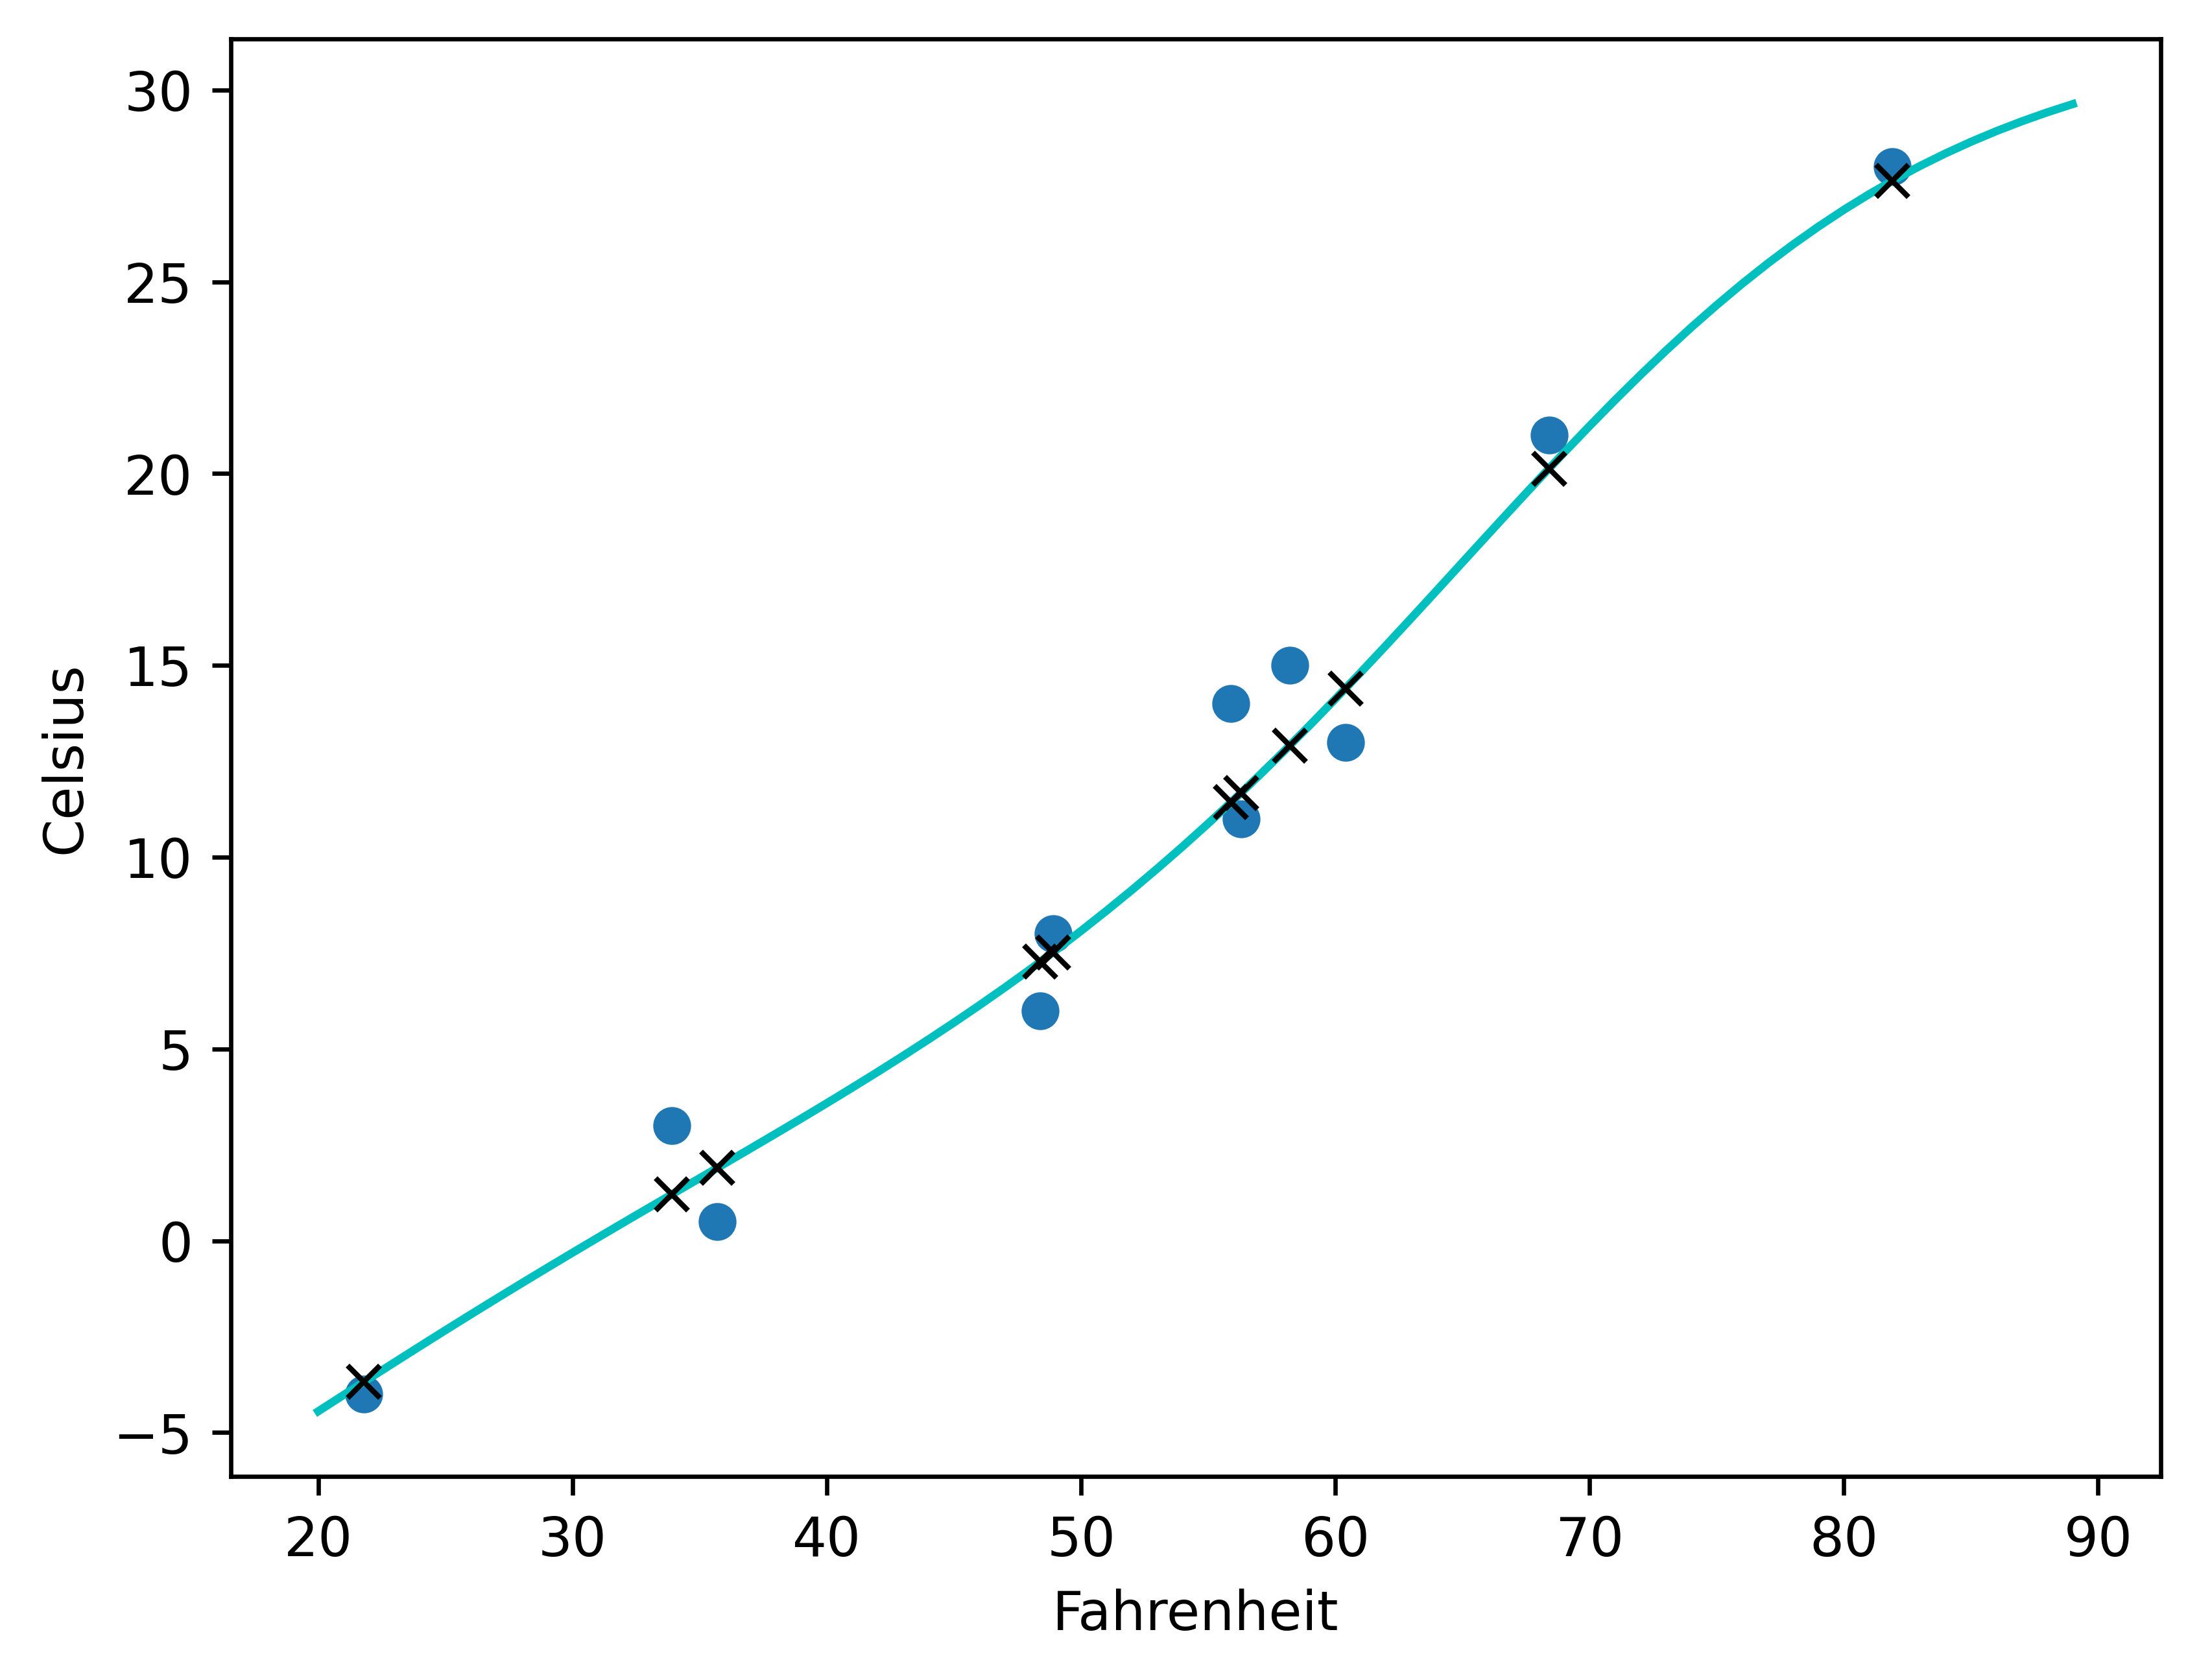

In [46]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')